<a href="https://colab.research.google.com/github/lingchm/datascience/blob/master/exercises/socially_distanced_robots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Socially Distanced Robots

**Problem**
Suppose we have N robots located on a 2D grid. We want to move the robots so that they eventually meet up at the same location. However, these robots are socially distanced. In other words, they should not try to meet at the same location but end up at a distance > 0 away from each other.

**Method**
We formulate the following optimization problem and solve it using gradient descent and Nesterov's method.

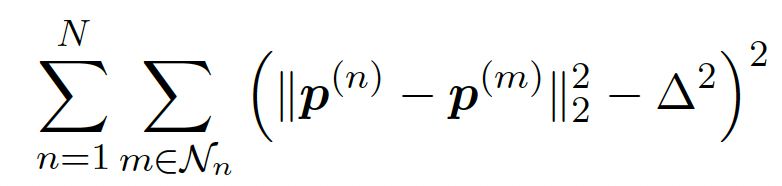

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initialize 10 robots 
np.random.seed(2021)
p = np.random.uniform(0,50,[2,10])

In [4]:
# utility function 
def plotRobots(p, title="", size=50):
    plt.scatter(p[0], p[1])
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.title(title)
    plt.show()
    return

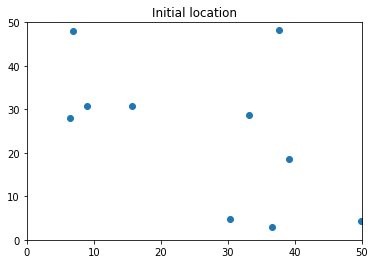

In [5]:
# visualize initial location
plotRobots(p, "Initial location", size=50)

In [6]:
# implement algorithm
def grad_f(p, dist):
    grad = np.zeros(p.shape)
    # for each robot
    for i in range(p.shape[1]):
        # for each of this robot's neighbors (all other robots)
        for j in range(p.shape[1]):
            grad[:, i] += (np.linalg.norm(p[:,i] - p[:,j])**2 - dist**2) \
                          * (p[:,i] - p[:,j])
    return grad
        
def swarmRobots(p0, alpha=0.001, dist=6, tol=10, max_iter=500, method='SG'):
    k, pk, pk_ = 0, p0*1, p0*0
    while k < max_iter: #np.linalg.norm(pk - pk_) > tol and 
        #plotRobots(pk, title="Iteration " + str(k))
        if method == 'SG':
            pk_ = pk * 1
            pk += - alpha * grad_f(pk, dist)
        elif method == 'Nesterov':
            beta = (k - 1) / (k + 2)
            p = pk - pk_
            pk_ = pk * 1
            pk += - alpha * grad_f(pk + beta * p, dist) + beta * p
        k += 1
    print("Final p:", pk)
    return pk

Final p: [[24.53544765 29.44654126 23.64196614 23.94469662 28.7245668  29.5775933
  24.77005686 23.8062581  29.28216491 27.00884428]
 [27.53617418 22.55457794 26.71587272 22.34570501 21.7642784  25.94788795
  21.64749776 22.51131782 26.44053401 27.94386986]]


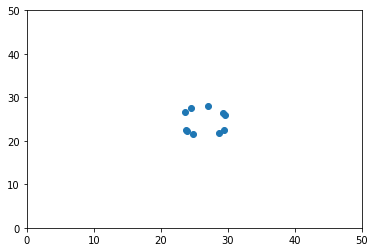

In [7]:
# results using gradient descent
pk = swarmRobots(p, alpha=0.0001)
plotRobots(pk)

Final p: [[12.99422015 13.6486386  12.59091656 10.20368704 15.89665403  9.97944042
   9.77390326 15.06150581 15.53859274 16.68150935]
 [ 8.8141172   8.83013161 15.67412462 13.94244663 10.05079455 11.09361083
  12.31714099 15.21533353 14.85940514 11.90675272]]


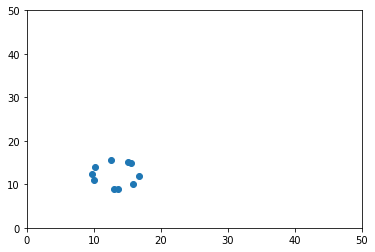

In [8]:
# results using nesterov
pk = swarmRobots(p, alpha=0.0001, method='Nesterov')
plotRobots(pk)